In [1]:
pip install praw networkx matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 1.6 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

✅ Done! Collected 608 reply edges.
🚩 Detected 5 users posting misinformation.

👑 Top users by in-degree centrality:
the_art_of_the_taco: 0.0352
Lower_Pass_6053: 0.0327
Positive_Note8538: 0.0302
Skellyhell2: 0.0302
jaejaeok: 0.0251
FishHammer: 0.0226
Kluechexs1: 0.0201
ArcaneDramaKing: 0.0176
DuckworthBuckington: 0.0176
External-Noise-4832: 0.0176


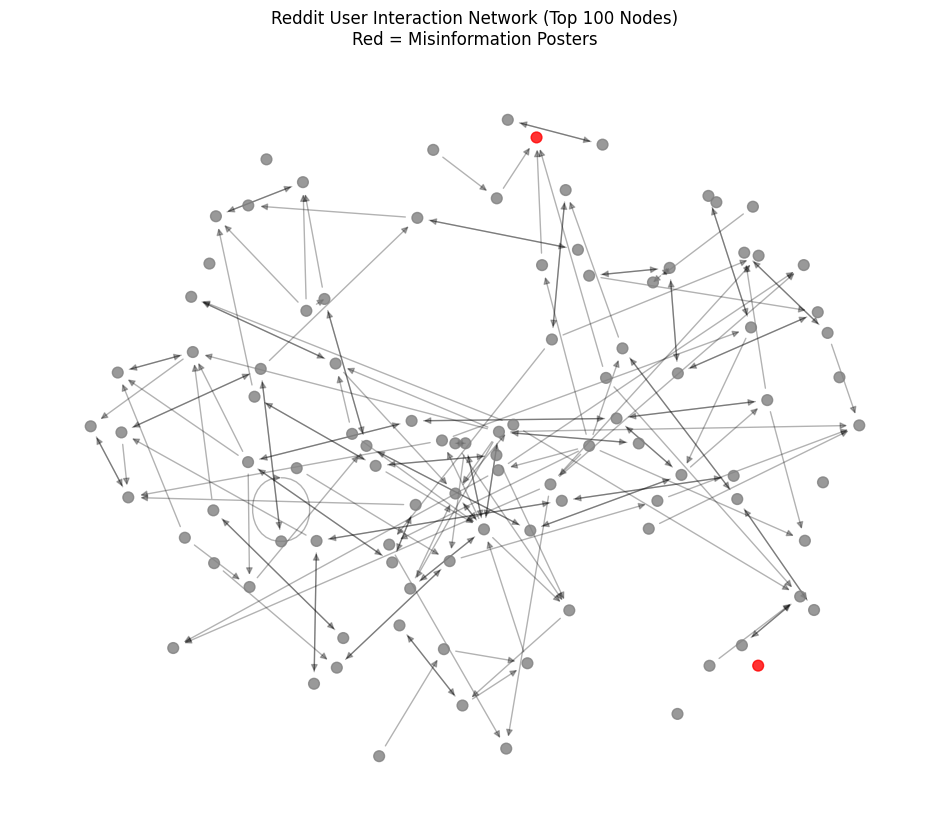

📁 Saved interaction data to reddit_misinformation_network.csv


In [8]:

# --- IMPORTS ---
import praw
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# --- AUTHENTICATE WITH REDDIT ---
reddit = praw.Reddit(
    client_id="DibdLZJ3B6JGnmuA92COCQ",
    client_secret="PwZmPlwD2cgorErIsle7YEnxlnz01g",
    user_agent="MisinformationBot by /u/East_Discipline_9999"
)

# --- DEFINE MISINFORMATION KEYWORDS ---
misinfo_keywords = [
    "covid", "vaccine", "pandemic", "plandemic", "hoax",
    "ivermectin", "microchip", "5g", "mrna", "lab leak",
    "depopulation", "fake virus", "covid cure", "vax", "jab"
]

# --- TARGET SUBREDDIT ---
subreddit = reddit.subreddit("conspiracy")  # You can change this

# --- COLLECT USER INTERACTIONS ---
user_edges = []
misinfo_users = set()  # Track users who post misinformation

print("Collecting comments and detecting misinformation...")

for submission in subreddit.hot(limit=10):
    submission.comments.replace_more(limit=0)
    comments = submission.comments.list()

    # Step 1: Build comment_id = author mapping
    id_to_author = {}
    for comment in comments:
        if comment.author:
            author_name = comment.author.name
            id_to_author[comment.id] = author_name

            # Check if the comment contains misinformation keywords
            comment_text = comment.body.lower()
            if any(keyword in comment_text for keyword in misinfo_keywords):
                misinfo_users.add(author_name)

    # Step 2: Build user-to-user reply edges
    for comment in comments:
        try:
            if comment.author and comment.parent_id.startswith("t1_"):
                source_user = comment.author.name
                parent_id = comment.parent_id.split("_")[1]
                target_user = id_to_author.get(parent_id)
                if target_user:
                    user_edges.append((source_user, target_user))
        except Exception:
            continue

print(f"Collected {len(user_edges)} reply edges.")
print(f"Detected {len(misinfo_users)} users posting misinformation.")

# --- BUILD NETWORK GRAPH ---
G = nx.DiGraph()
G.add_edges_from(user_edges)

# --- CENTRALITY ANALYSIS ---
centrality = nx.in_degree_centrality(G)
top_users = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("\nTop users by in-degree centrality:")
for user, score in top_users:
    print(f"{user}: {score:.4f}")

# --- VISUALIZE NETWORK (LIMIT TO TOP 100 USERS) ---
top_nodes = sorted(dict(G.degree()).items(), key=lambda x: x[1], reverse=True)[:100]
top_node_names = [node for node, _ in top_nodes]
G_small = G.subgraph(top_node_names)

# Color nodes: red for misinfo users, gray for others
node_colors = ['red' if node in misinfo_users else 'gray' for node in G_small.nodes()]

# Draw the network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_small, k=0.4)
nx.draw_networkx_nodes(G_small, pos, node_size=60, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G_small, pos, alpha=0.3)
plt.title("Reddit User Interaction Network (Top 100 Nodes)\nRed = Misinformation Posters")
plt.axis("off")
plt.show()

# --- EXPORT TO CSV ---
df = pd.DataFrame(user_edges, columns=["source_user", "target_user"])
df["source_is_misinfo"] = df["source_user"].apply(lambda x: x in misinfo_users)
df["target_is_misinfo"] = df["target_user"].apply(lambda x: x in misinfo_users)
df.to_csv("reddit_misinformation_network.csv", index=False)

print("Saved interaction data to reddit_misinformation_network.csv")


In [ ]:
print("Reddit client initialized!")

# Test pulling 3 posts from a subreddit
for submission in reddit.subreddit("conspiracy").hot(limit=3):
    print(f"Title: {submission.title}")
